## G@C operating cost per recycling volume

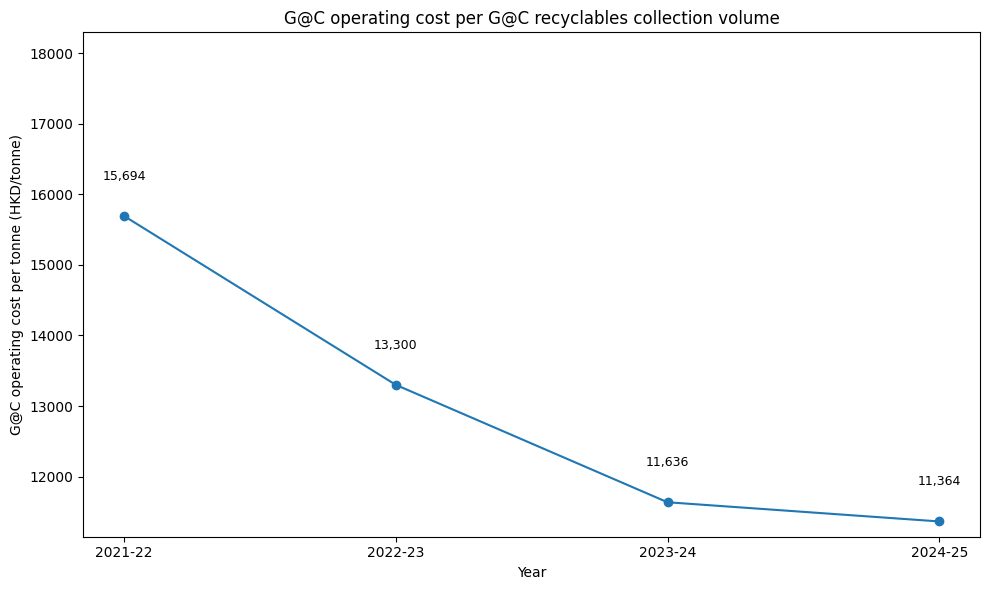

In [1]:
# ==== Install required packages (run these in a terminal, not inside Python) ====
# pip install pandas matplotlib openpyxl

import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1. Load data from the Excel file
# -------------------------------------------------------
excel_path = "../General Stats_G@C_clean.xlsx"

# HK MSW + G@C recyclables volume
hk = pd.read_excel(
    excel_path,
    sheet_name="HK MSW Volume and Recycling Rat"
)

# G@C total operating cost
gc = pd.read_excel(
    excel_path,
    sheet_name="G@C Recyclables Collection Volu"
)

# -------------------------------------------------------
# 2. Prepare data for "cost per tonne"
# -------------------------------------------------------

# From HK sheet: Year and G@C recyclables collection volume (tonnes)
hk_sub = hk[[
    "Year",
    "G@C recyclables collection volume (tonnes)"
]].dropna(subset=["Year", "G@C recyclables collection volume (tonnes)"]).copy()

hk_sub["Year_int"] = hk_sub["Year"].astype(int)

# From G@C sheet: numeric year and total operating cost
gc["Year_num"] = gc["Year"].astype(str).str[:4].astype(int)
gc_sub = gc[["Year_num", "G@C total operating cost"]].copy()

# Merge calendar year with operating cost
merged = (
    hk_sub.merge(
        gc_sub,
        left_on="Year_int",
        right_on="Year_num",
        how="inner"
    )
    .sort_values("Year_int")
)

# Keep only data from 2021 onwards
merged = merged[merged["Year_int"] >= 2021]

# Compute cost per tonne (HKD per tonne)
merged["cost_per_tonne"] = (
    merged["G@C total operating cost"]
    / merged["G@C recyclables collection volume (tonnes)"]
)

# -------------------------------------------------------
# 3. Plot: line chart of G@C total operating cost per tonne
# -------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 6))

x = merged["Year_int"]
y = merged["cost_per_tonne"]

ax.plot(
    x,
    y,
    marker="o",
    linestyle="-",
)

# Use fiscal-year style labels on the x-axis
ax.set_xlabel("Year")
ax.set_ylabel("G@C operating cost per tonne (HKD/tonne)")
ax.set_xticks(x)
ax.set_xticklabels(["2021-22", "2022-23", "2023-24", "2024-25"], rotation=0)

# Add value labels on top of each point
y_offset = y.max() * 0.03  # small vertical offset
for xi, yi in zip(x, y):
    ax.text(
        xi,
        yi + y_offset,
        f"{yi:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# Add extra space at the top so labels are not cut off
y_min, y_max = ax.get_ylim()
ax.set_ylim(y_min, y_max * 1.15)

plt.title("G@C operating cost per G@C recyclables collection volume")
plt.tight_layout()
plt.show()
